In [7]:
import pandas as pd
import numpy as np

import random
import string

from datetime import timedelta
%matplotlib inline

In [2]:

def generateData(start="20180101T00:00:00Z", count=100, columns=1, maxSeconds=108000):
    nextDate = pd.Timestamp("20180101T00:00:00Z")
    data = []
    for i in range(0,count):
        nextDate = nextDate + timedelta(seconds=random.randint(0,maxSeconds))
        data.append([nextDate] +  [random.choice(string.ascii_letters).lower() for i in range(0,columns)]) 
    return data 

In [3]:
logdata = generateData(count=10000,columns=3,maxSeconds=300)

print(logdata[0],logdata[-1])

[Timestamp('2018-01-01 00:00:29+0000', tz='UTC'), 'c', 'j', 'n'] [Timestamp('2018-01-18 11:31:51+0000', tz='UTC'), 'i', 'j', 'z']


In [4]:
data = pd.DataFrame(logdata,columns=['datestamp','spam','eggs','hash'])
data.head()

,datestamp,spam,eggs,hash
0,2018-01-01 00:00:29+00:00,c,j,n
1,2018-01-01 00:04:44+00:00,n,w,b
2,2018-01-01 00:07:06+00:00,k,k,e
3,2018-01-01 00:07:25+00:00,g,e,n
4,2018-01-01 00:11:44+00:00,p,x,i


                           spam  eggs  hash
datestamp                                  
2018-01-01 00:00:29+00:00   0.0   0.0   0.0
2018-01-01 00:04:44+00:00   0.0   0.0   0.0
2018-01-01 00:07:06+00:00   0.0   0.0   0.0
2018-01-01 00:07:25+00:00   0.0   1.0   0.0
2018-01-01 00:11:44+00:00   0.0   0.0   0.0
                           spam  eggs  hash
datestamp                                  
2018-01-01 00:00:00+00:00  23.0  23.0  22.0
2018-01-02 00:00:00+00:00  17.0  15.0  24.0
2018-01-03 00:00:00+00:00  22.0  15.0  21.0
2018-01-04 00:00:00+00:00  28.0  30.0  18.0
2018-01-05 00:00:00+00:00  21.0  18.0  23.0


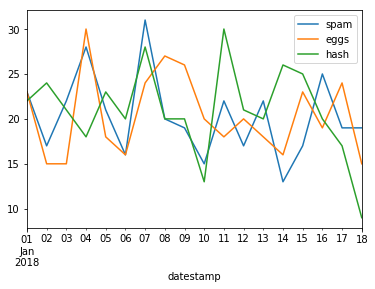

In [8]:
cols = ['spam','eggs','hash']
s = data.copy()
#s = data[data.spam=='s' and data.eggs == 'e' and data.hash == 'h'].copy()
#s = s[['datestamp','spam','eggs','hash']]
#s['spam'] = s['spam'].map({'s': 1.0})
for col in cols:
    s[col] = s[col].map({col[0]:1.0})

a= "50"
    
s.index=s['datestamp']
del s['datestamp']
s.fillna(0,inplace=True)
print(s.head())
perDay = s.resample('D').sum()
print(perDay.head())
perDay.plot()

In [6]:
s.describe()

,spam,eggs,hash
count,10000.000000,10000.000000,10000.000000
mean,0.036600,0.036700,0.037700
std,0.187787,0.188034,0.190479
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000
